<a href="https://colab.research.google.com/github/Manalis133/IBM_Skillbuild/blob/main/Sentiment_analysis_of_restaurant_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [3]:
dataset = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
corpus = []
for i in range(0, len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [7]:
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
print("Multinomial Naive Bayes:")
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

Multinomial Naive Bayes:


MultinomialNB(alpha=0.1)

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
cm = confusion_matrix(y_test, y_pred)
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy is ", round(score1 * 100, 2), "%")
print("Precision is ", round(score2, 2))
print("Recall is ", round(score3, 2))

Confusion Matrix:
 [[119  33]
 [ 34 114]]
Accuracy is  77.67 %
Precision is  0.78
Recall is  0.77


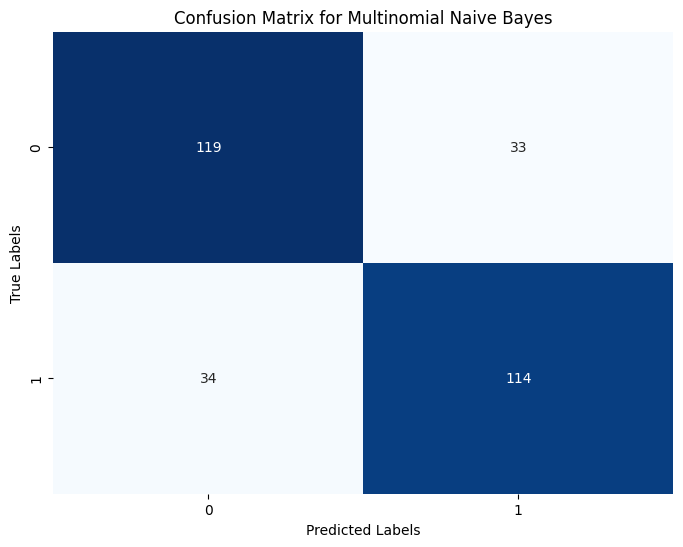

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Multinomial Naive Bayes')
plt.show()

In [13]:
print("\nBernoulli Naive Bayes:")
classifier = BernoulliNB(alpha=0.8)
classifier.fit(X_train, y_train)


Bernoulli Naive Bayes:


BernoulliNB(alpha=0.8)

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
cm = confusion_matrix(y_test, y_pred)
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy is ", round(score1 * 100, 2), "%")
print("Precision is ", round(score2, 2))
print("Recall is ", round(score3, 2))


Confusion Matrix:
 [[115  37]
 [ 32 116]]
Accuracy is  77.0 %
Precision is  0.76
Recall is  0.78


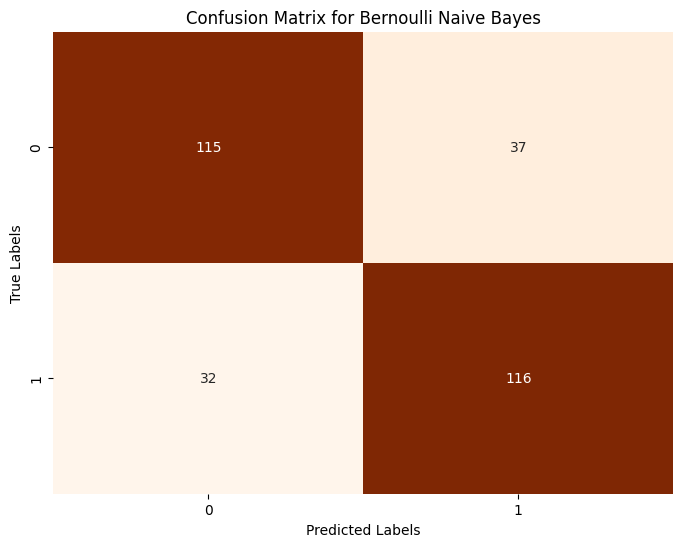

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Bernoulli Naive Bayes')
plt.show()

In [17]:
print("\nLogistic Regression:")
classifier = LogisticRegression(C=1.5)
classifier.fit(X_train, y_train)


Logistic Regression:


LogisticRegression(C=1.5)

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
cm = confusion_matrix(y_test, y_pred)
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy is ", round(score1 * 100, 2), "%")
print("Precision is ", round(score2, 2))
print("Recall is ", round(score3, 2))

Confusion Matrix:
 [[125  27]
 [ 43 105]]
Accuracy is  76.67 %
Precision is  0.8
Recall is  0.71


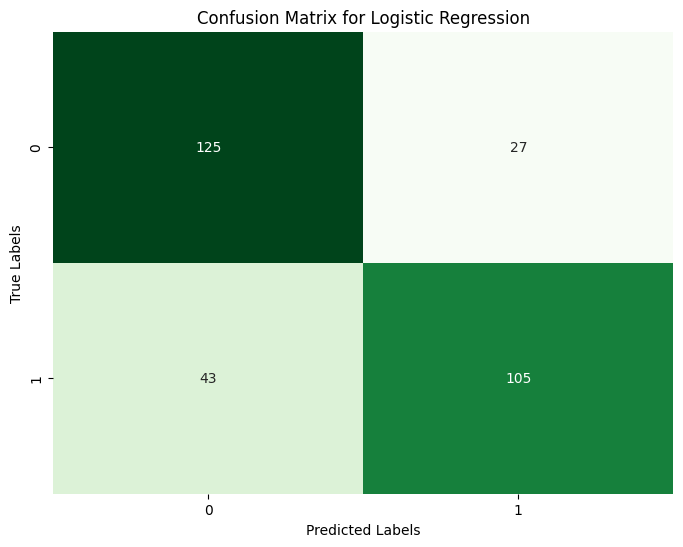

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()